In [1]:
import os
# import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

# print(folium.__version__)

In [2]:
dfloc = pd.read_csv('kycd_loc.csv', header=9)
dfloc.head()

,(,),578,8595
0,(40.498060701,-74.248893743),351,1
1,(40.49876753,-74.240511403),107,1
2,(40.49876753,-74.240511403),341,6
3,(40.49876753,-74.240511403),344,3
4,(40.49876753,-74.240511403),351,2


In [3]:
dfloc.columns = ['lat', 'lon', 'kycd', 'cnt']
dfloc.head()

,lat,lon,kycd,cnt
0,(40.498060701,-74.248893743),351,1
1,(40.49876753,-74.240511403),107,1
2,(40.49876753,-74.240511403),341,6
3,(40.49876753,-74.240511403),344,3
4,(40.49876753,-74.240511403),351,2


In [4]:
dfloc['lat'] = np.array([float(str(i)[1:]) for i in dfloc.lat.values])
dfloc['lon'] = np.array([float(str(i)[:-1]) for i in dfloc.lon.values])
dfloc.head()

,lat,lon,kycd,cnt
0,40.498061,-74.248894,351,1
1,40.498768,-74.240511,107,1
2,40.498768,-74.240511,341,6
3,40.498768,-74.240511,344,3
4,40.498768,-74.240511,351,2


In [5]:
print( sum(dfloc.isnull().values) )
print( dfloc.shape )
dfloc.describe()

[0 0 0 0]
(557461, 4)


,lat,lon,kycd,cnt
count,557461.000000,557461.000000,557461.000000,557461.000000
mean,40.713864,-73.918996,297.803785,6.621538
std,0.086010,0.099872,150.649372,29.262535
min,40.498061,-74.255076,105.000000,1.000000
25%,40.650653,-73.972612,109.000000,1.000000
50%,40.706045,-73.916128,341.000000,3.000000
75%,40.768576,-73.854069,351.000000,6.000000
max,40.912723,-73.700316,578.000000,13566.000000


In [6]:
# dfloc = dfloc[(dfloc.year <= 2015) & (dfloc.year >= 2006)]

In [7]:
dfloc['cnt'] = np.array([i**2 for i in dfloc.cnt.values])

In [9]:
dfloc.head()

,lat,lon,kycd,cnt
0,40.498061,-74.248894,351,1
1,40.498768,-74.240511,107,1
2,40.498768,-74.240511,341,36
3,40.498768,-74.240511,344,9
4,40.498768,-74.240511,351,4


[(40.498061, 40.912723),
 (-74.255076, -73.700316),

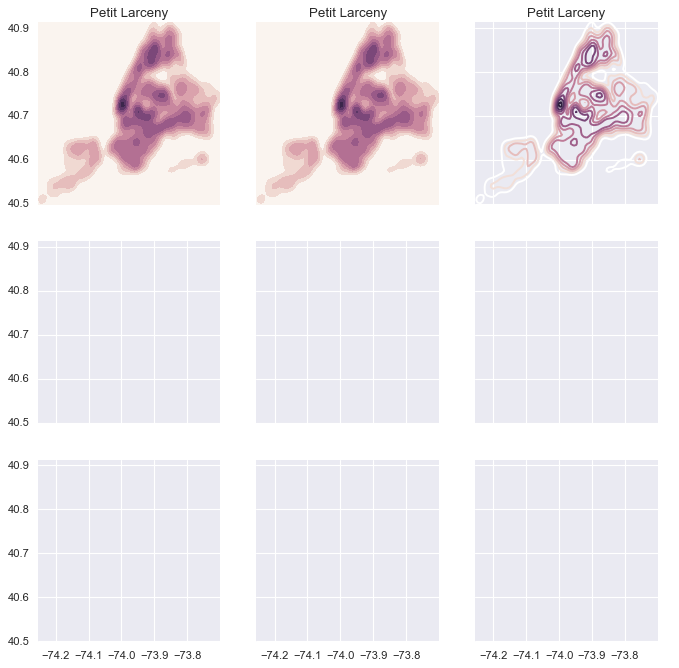

In [13]:
f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)


# 341: Petit Larceny
x = dfloc[dfloc.kycd == 341].lon.values
y = dfloc[dfloc.kycd == 341].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Petit Larceny')


# 341: Petit Larceny
x = dfloc[dfloc.kycd == 341].lon.values
y = dfloc[dfloc.kycd == 341].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=3, ax=axes[0,1])
axes[0,1].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Petit Larceny')

# 341: Petit Larceny
x = dfloc[dfloc.kycd == 341].lon.values
y = dfloc[dfloc.kycd == 341].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=False, cut=5, ax=axes[0,2])
axes[0,2].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Petit Larceny')



# cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)

# # 578: Harrassment 2
# x = dfloc[dfloc.kycd == 578].lon.values
# y = dfloc[dfloc.kycd == 578].lat.values
# sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,1])
# axes[0,1].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Harrassment 2')

# cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)

# # 344: Assault 3 & Related Offenses
# x = dfloc[dfloc.kycd == 344].lon.values
# y = dfloc[dfloc.kycd == 344].lat.values
# sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,2])
# axes[0,2].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Assault 3 & Related Offenses')

# cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)

# # 351: Criminal Mischief
# x = dfloc[dfloc.kycd == 351].lon.values
# y = dfloc[dfloc.kycd == 351].lat.values
# sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[1,0])
# axes[1,0].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Criminal Mischief')

# cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)

# # 109: Grand Larceny
# x = dfloc[dfloc.kycd == 109].lon.values
# y = dfloc[dfloc.kycd == 109].lat.values
# sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[1,1])
# axes[1,1].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Grand Larceny')

# cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)

# # 235: Dangerous Drugs
# x = dfloc[dfloc.kycd == 235].lon.values
# y = dfloc[dfloc.kycd == 235].lat.values
# sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[1,2])
# axes[1,2].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Dangerous Drugs')

# cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)

# # 361: Offense Against Public Order Sensibility
# x = dfloc[dfloc.kycd == 361].lon.values
# y = dfloc[dfloc.kycd == 361].lat.values
# sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[2,0])
# axes[2,0].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Offense Against Public Order Sensibility')

# cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)

# # 105: Robbery
# x = dfloc[dfloc.kycd == 105].lon.values
# y = dfloc[dfloc.kycd == 105].lat.values
# sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[2,1])
# axes[2,1].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Robbery')

# cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)

# # 107: Burglary
# x = dfloc[dfloc.kycd == 107].lon.values
# y = dfloc[dfloc.kycd == 107].lat.values
# sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[2,2])
# axes[2,2].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Burglary')

In [12]:
dfloc.head()

,lat,lon,kycd,cnt
0,40.498061,-74.248894,351,1
1,40.498768,-74.240511,107,1
2,40.498768,-74.240511,341,36
3,40.498768,-74.240511,344,9
4,40.498768,-74.240511,351,4


[(40.498061, 40.912723),
 (-74.255076, -73.700316),

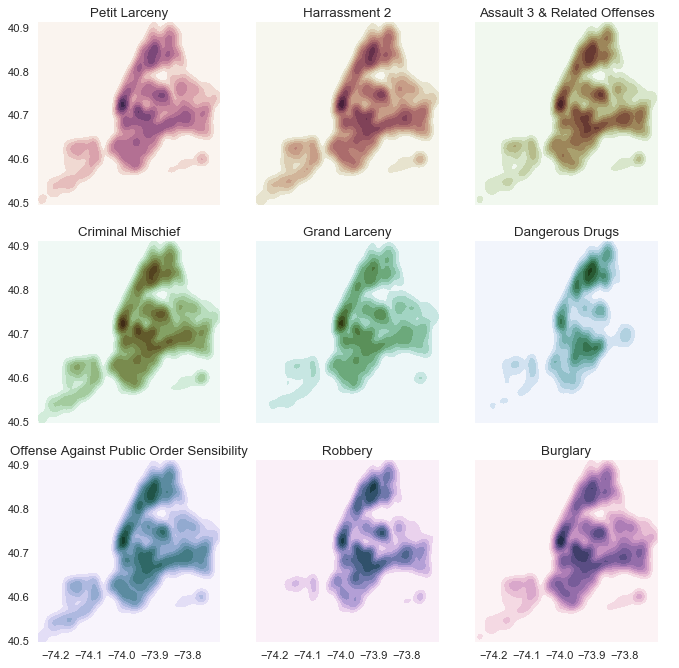

In [89]:






f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)


# 341: Petit Larceny
x = dfloc[dfloc.kycd == 341].lon.values
y = dfloc[dfloc.kycd == 341].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Petit Larceny')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)

# 578: Harrassment 2
x = dfloc[dfloc.kycd == 578].lon.values
y = dfloc[dfloc.kycd == 578].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,1])
axes[0,1].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Harrassment 2')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)

# 344: Assault 3 & Related Offenses
x = dfloc[dfloc.kycd == 344].lon.values
y = dfloc[dfloc.kycd == 344].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,2])
axes[0,2].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Assault 3 & Related Offenses')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)

# 351: Criminal Mischief
x = dfloc[dfloc.kycd == 351].lon.values
y = dfloc[dfloc.kycd == 351].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[1,0])
axes[1,0].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Criminal Mischief')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)

# 109: Grand Larceny
x = dfloc[dfloc.kycd == 109].lon.values
y = dfloc[dfloc.kycd == 109].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[1,1])
axes[1,1].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Grand Larceny')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)

# 235: Dangerous Drugs
x = dfloc[dfloc.kycd == 235].lon.values
y = dfloc[dfloc.kycd == 235].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[1,2])
axes[1,2].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Dangerous Drugs')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)

# 361: Offense Against Public Order Sensibility
x = dfloc[dfloc.kycd == 361].lon.values
y = dfloc[dfloc.kycd == 361].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[2,0])
axes[2,0].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Offense Against Public Order Sensibility')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)

# 105: Robbery
x = dfloc[dfloc.kycd == 105].lon.values
y = dfloc[dfloc.kycd == 105].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[2,1])
axes[2,1].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Robbery')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)

# 107: Burglary
x = dfloc[dfloc.kycd == 107].lon.values
y = dfloc[dfloc.kycd == 107].lat.values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[2,2])
axes[2,2].set(ylim=(40.498061, 40.912723), xlim=(-74.255076, -73.700316), title = 'Burglary')